In [11]:
import os
from sys import argv, stdout, stderr
from ROOT import TCanvas, TLegend, gROOT, TFile, TPad, gPad
import sys
gROOT.SetStyle("Plain")
gROOT.SetBatch(True)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TEfficiency::GetEfficiencyErrorLow>: frequentist confidence intervals for weights are only supported by the normal approximation
Info in <TEfficiency::GetEfficiencyErrorLow>: setting statistic option to kFNormal
Info in <TCanvas::Print>: png file MuonFRPt.png has been created


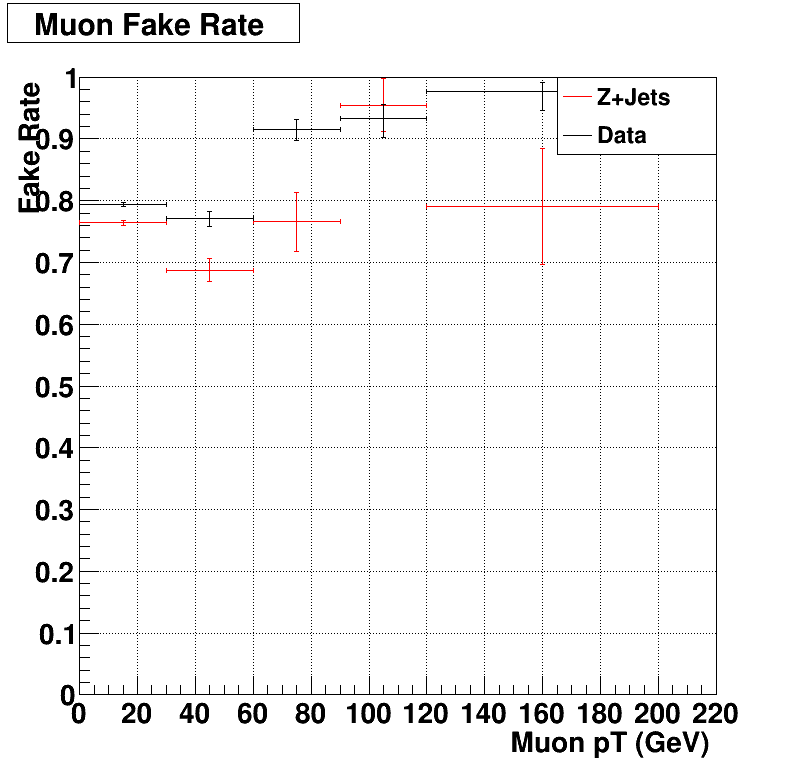

In [13]:
canvas = TCanvas('canvas','canvas',800,800)
legend = TLegend(0.7, 0.8, .9, .9)
grid = TPad("grid", "", 0, 0, 1, 1)
grid.Draw();
grid.cd();
grid.SetGrid();
grid.SetFillStyle(4000)
file = TFile('frMuonPt.root')
hdy = file.Get('dyfakerate')
hdy.SetLineColor(632)
hdata = file.Get('fakerate')
legend.AddEntry(hdy, 'Z+Jets', 'l')
legend.AddEntry(hdata, 'Data', 'l')
hdy.Draw()
hdata.Draw('SAME')
gPad.Update()
graph = hdy.GetPaintedGraph()
hdy.SetTitle("Muon Fake Rate;  Muon pT (GeV); Fake Rate")
graph.SetMinimum(0)
graph.SetMaximum(1.0)
gPad.Update()
legend.Draw()
canvas.Draw()
canvas.SaveAs('MuonFRPt.png')